<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-\amily:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Gradient Descent
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 3: Topic 23</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>

In data science:
- Supervised learning
- Trying to train model or input/output predictive function
- Learn model parameters/weights.

Optimal weights/parameters:
    
- where defined cost function L is at a minimum.

With linear regression is squared loss:

$$ L =  |\textbf{y }- X \textbf{w} |^2 $$

for 1D linear regression is compact linear algebra notation for:

$$ L =  \sum_i|y_i - w_1 x_i - w_0 |^2 = \\ \sum_i|y_i - \hat{y}_i |^2  $$

Slope weight including bias. 

2D minimization problem.


Parameters:
- $w_0$, $w_1$

Let's find $w_0$ and $w_1$ that minimizes $L$:
- Minimize partial derivatives: 
-  $\frac{\partial L}{\partial w_0} = 0$ and $ \frac{\partial L}{\partial w_1} = 0 $

<img src = "images\local_minimum.jpg" width = 300 />

Minimum: partial derivates in **both** directions vanish

Import sympy and do some mathemagic:

In [39]:
from sympy import *
from sympy.abc import x,y

Define the loss function:

In [40]:
x, y, i, N, w0, w1 = symbols("x, y, i, N, w0, w1")
L = summation((Indexed('y',i) - Indexed('x',i)*w1 - w0)**2 ,(i,1,N))
L

Sum((-w0 - w1*x[i] + y[i])**2, (i, 1, N))

In [41]:
grad1 = diff(L, w0)
grad1

Sum(2*w0 + 2*w1*x[i] - 2*y[i], (i, 1, N))

In [42]:
grad2 = diff(L, w1)
grad2

Sum(-2*(-w0 - w1*x[i] + y[i])*x[i], (i, 1, N))

Setting grad1 to 0, solve for $w_0$:
$$ w_0 = \bar{y} - w_1\bar{x} $$

Plug in $w_0$, solve for $w_1$ setting grad2 to 0.

Algebra happened:


$$ w_1 = \frac{ \Big(\sum_i^Nx_iy_i) - N \bar{y}\bar{x} }{\Big(\sum_i^Nx_i^2\Big) - N \bar{x}^2}$$

With ordinary least squares linear regression: there's always a formula.
- Minimizing cost function
- Analytically find solution for model weights.

Can also use a computer to iteratively converge to minimum and get weights.

- Useful when you can't solve for weights analytically.
- When cost function as a function of fit parameters is complex.
- Most problems in machine learning.



**Solution: Gradient descent**

Look at it work for our simple linear regression:

<center><img src = "Images/simple_regression.gif" width = 500/></center>
<center>What's it doing?</center>

1. Randomly initialize weight vector $\textbf{w} = \textbf{w}^{(0)}$.
2. Compute cost function $J(\textbf{w}^{(0)})$.
2. Compute gradient of cost $J$: Gradient is in direction of highest slope.
3. Step weight vector in opposite direction for descent.

<center><img src = "Images/grad_desc_2d.png" width = 700/></center>


2. #### Engineering the weight vector step $\Delta \textbf{w}$

- step weight vector in opposite direction of gradient for descent.
- $\Delta \textbf{w}$ proportional to $ - \nabla_\textbf{w}J\Big|_{\textbf{w} = \textbf{w}^{(0)}}$


$$ \textbf{w}^{(0)} \rightarrow \textbf{w}^{(0)} + \Delta \textbf{w} $$


$$ \textbf{w}^{(0)} \rightarrow \textbf{w}^{(0)} - \alpha \nabla_\textbf{w}J\Big|_{\textbf{w} = \textbf{w}^{(0)}} $$

where $\alpha$ is a small parameter known as the **learning rate**.

Or component-wise:

$$ w_1^{(0)} \rightarrow w_1^{(0)} - \alpha \frac{\partial J}{\partial w_1}\Big|_{\textbf{w} = \textbf{w}^{(0)}} $$


$$ w_2^{(0)} \rightarrow w_2^{(0)} - \alpha \frac{\partial J}{\partial w_2}\Big|_{\textbf{w} = \textbf{w}^{(0)}} $$

<center><img src = "Images/grad_desc_2d.png" width = 700/></center>


<img src = "Images/simple_regression.gif" /> 

Starting at random initialization:
- Iteratively follow gradient 
- Go in direction of highest slope  
-

First create some data.

In [58]:
# Randomly created data in x & y
np.random.seed(27)

x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0, 3, 30)
y = 3 + 50 * x + y_randterm

Here's the data plotted out:

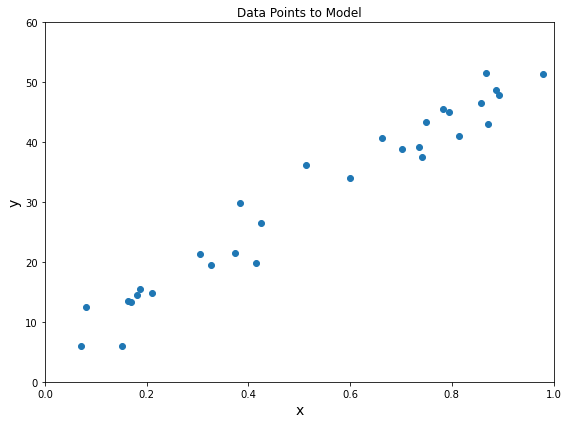

In [59]:
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)

ax.set_title('Data Points to Model')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_xlim(0, 1)
ax.set_ylim(0, 60)
plt.tight_layout()

In [45]:
# Plotting a guess of a regression line
def regression_formula(x, a, b):
    return a*x + b

def plot_data_and_guess(slope, intercept, ax, x1=x, x2=y, **kwargs):
    '''
    Plot our data and regression line on the given axis.

    Arguments:
        slope : float
            Value for the slope the regression line.
            
        intercept : float
            Value for the intercept the regression line.
        
        ax : Axes
            Axis to plot data and regression line
        
        x1 : array-like
            Values along the x-axis
        
        x2 : array-like
            Values along the y-axis
        
    Returns:
        fig : Figure

        ax : Axes
    '''
    # Plot data and regression line
    ax.scatter(x1, x2)
    yhat = regression_formula(x1, slope, intercept)
    ax.plot(x1, yhat, 'r-', **kwargs)
    
    # Embelishments
    ax.set_title('Data Points to Model')
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 60)

    return ax

## Gradient Descent in Words

- Make a guess at where the function attains its minimum value
- Calculate the gradient/derivative at that point
- Use that value to decide how to make your next guess!

Repeat until we get the derivative as close as we like to 0.

If we want to improve our guess at the minimum of our loss function, we'll move in the **opposite direction** of the gradient away from our last guess. Hence we are using the *gradient* of our loss function to *descend* to the minimum value of the relevant loss function.

## Stepping Down a Hill: Step Size

So we now have the basic idea of gradient descent of "going down a hill" and hopefully it's obvious that the steeper the hill, the more we can adjust our parameters to get to "bottom" (optimal parameters) faster.

But a big question is how big of a step do we take?

> The amount we adjust our parameter is determined by our **step size**.

If our steps are _too big_, we risk skipping over the minimum value (optimal parameters).

If our steps are _too small_, it might take us too long to reach the minimum value.

![learning_rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

Here's an elegant solution: Make the size of your step **proportional to the value of the derivative at the point where you currently are in parameter space**! If we're very far from the minimum, then our values will be large, and so we therefore can safely take a large step; if we're close to the minimum, then our values will be small, and so we should therefore take a smaller step.

I said the size of the step is proportional to the value of the derivative. The constant of proportionality is often called the **"learning rate"**. 

This page helps to explain the dangers of learning rates that are too large and too small: https://www.jeremyjordan.me/nn-learning-rate/.

> Note there are other optimizations we can do for gradient descent that rely on adjusting our cost function or how we take steps or both.

## Putting It All Together

The general algorithm looks like this:

We'll make a guess, $\vec{s}$, at where our loss function attains a minimum. If we're not happy with how close the value of the gradient there is to 0, then we'll make a new guess, and the new guess will be constructed as follows:

$\large\vec{s}_{new} = \vec{s}_{old} - \alpha\nabla f(\vec{s}_{old})$,

where $\alpha$ is the learning rate.

In the one-dimensional case, we'll have:

$\large x_{new} = x_{old} - \alpha\frac{df}{dx}|_{x_{old}}$.

# Gradient Descent Walkthrough

Let's go back to our original example and implement gradient descent to find the optimal parameters (slope and intercept).

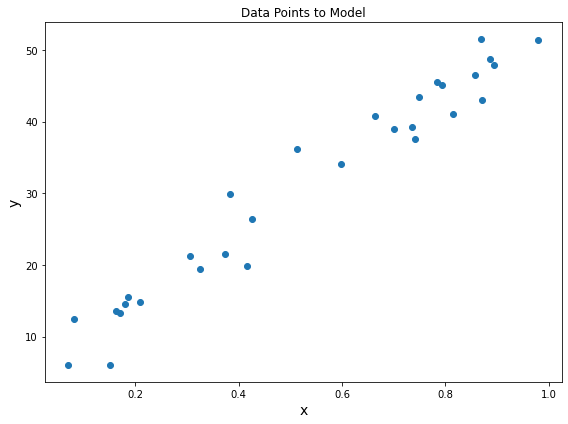

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)

ax.set_title('Data Points to Model')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

plt.tight_layout()

In [47]:
def partial_deriv(a, b, x_i, y_i, respect_to):
    '''
    Get the partial derivative for cost function with respect to slope (a) 
    or intercept (b).
    '''
    if respect_to == 'b': # intercept
        return (y_i - (a * x_i + b))
    elif respect_to == 'a': # slope
        return (x_i * (y_i - (a * x_i + b)))
    else:
        print('Choose either respect_to: a or b ')
        return 0

Next let's define the step we take (amount we adjust the parameters by) using the gradient and learning rate:

In [48]:
def step_gradient(a, b, x, y, learning_rate):
    db = 0
    da = 0 
    # For each data point, update the derivative for the slope & intercept
    N = len(x)
    for i in range(N):
        
        # Partial derivatives of loss/cost function with respect to b & a
        # Here's where we're taking our averages. Notice that we're leaving
        # off the factors of 2.
        db +=  -(1/N) * partial_deriv(a, b, x[i], y[i], respect_to='b')
        da +=  -(1/N) * partial_deriv(a, b, x[i], y[i], respect_to='a')
        
    # Adjust the slope & intercept by the gradient
    new_b = b - (learning_rate * db)
    new_a = a - (learning_rate * da)
    
    return (new_a, new_b)

Let's try it out and keep track of our guesses:

In [49]:
guesses = []
alpha = 0.05

In [50]:
# Our guess
guess = {
    'slope': 60,
    'intercept': 10
}

guesses.append(guess)

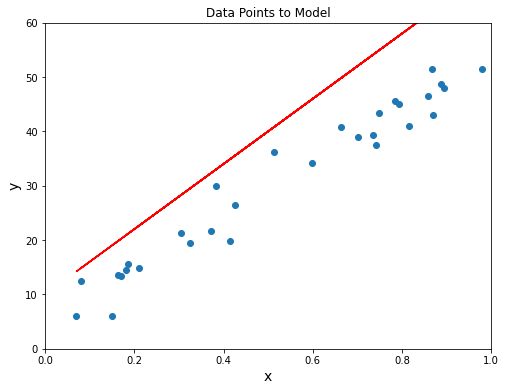

In [51]:
f, ax = plt.subplots(figsize=(8, 6))
plot_data_and_guess(**guess, ax=ax);

In [52]:
step = step_gradient(guess['slope'], guess['intercept'], x, y, learning_rate=alpha)
step

(59.66283387366331, 9.453693760762704)

In [53]:
mse(x, y, guess['slope'], guess['intercept'])

NameError: name 'mse' is not defined

Let's update our guess and try again:

In [54]:
# Our guess using the new step
new_slope, new_intercept = step
guess = {
    'slope': new_slope,
    'intercept': new_intercept
}
guesses.append(guess)

# Getting adjusted parameters
step = step_gradient(guess['slope'], guess['intercept'], x, y, learning_rate=alpha)
display(step)
display(mse(x, y, guess['slope'], guess['intercept']))

# Plotting out our new parameters
f, ax = plt.subplots(figsize=(8, 6))
plot_data_and_guess(**guess, ax=ax);

(59.346287082723265, 8.943633019184857)

NameError: name 'mse' is not defined

Let's repeat this another 200 times:

In [55]:
for i in range(200):
    # Our guess using the new step
    new_slope, new_intercept = step
    guess = {
        'slope': new_slope,
        'intercept': new_intercept
    }
    guesses.append(guess)

    # Getting adjusted parameters
    step = step_gradient(guess['slope'], guess['intercept'], x, y, learning_rate=alpha)
    #  Only display every 10
    if (i % 10) == 0:
        print(f'Step # {i}:')
        display(step)
        display(mse(x, y, guess['slope'], guess['intercept']))
        print('-'*30)

Step # 0:


(59.04902353477659, 8.4674593764414)

NameError: name 'mse' is not defined

What does our final result look like?

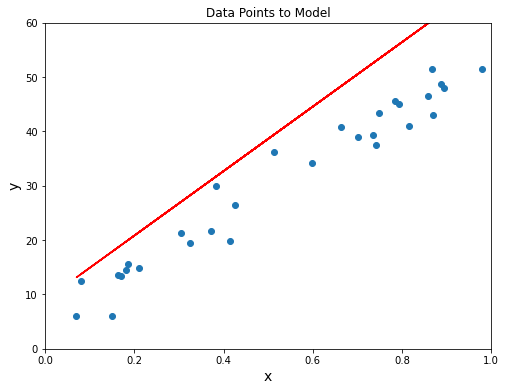

In [56]:
# Plotting out our new parameters
f, ax = plt.subplots(figsize=(8, 6))
plot_data_and_guess(**guesses[-1], ax=ax);

Let's take a look at the MSE over the guesses:

In [57]:
mses = [
    mse(x, y, d['slope'], d['intercept']) for d in guesses
]
plt.plot(range(len(mses)), mses);

NameError: name 'mse' is not defined

This was what we had for 200 iterations. What could we do to improve or speed up this method?